# Logistic Regression

>### [예제 11: SOL] Blood Pressure Logistic Regression (TF)

>### Load modules

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.18.5
TensorFlow Version :2.3.0
Matplotlib Version :3.2.2


> ### Input and Label

In [2]:
#Input(AGE) and Labels(BP)
x_input = tf.constant([[25,22],[25,26],[25,30],[35,22],[35,26],[35,30],[45,22],[45,26],[45,30],[55,22],[55,26],[55,30],[65,22],[65,26],[65,30],[73,22],[73,26],[73,30]], dtype= tf.float32)
labels = tf.constant([[0],[0],[1],[0],[1],[0],[0],[0],[1],[0],[0],[1],[1],[1],[1],[0],[1],[1]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal(()), dtype=tf.float32)

In [3]:
# Min Max Scaler
x_input_org = x_input
x_min, x_max = np.min(x_input, axis=0), np.max(x_input, axis=0)
x_input = (x_input-x_min)/(x_max-x_min)

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} \\ x_{21} & x_{22} \\ x_{31} & x_{32} \\ \end{bmatrix}$
>### $W = \begin{bmatrix} w_{1} \\ w_{2} \\\end{bmatrix}$
>### $H(x) = XW + b$

In [4]:
# Hypothesis
def Hypothesis(x):
  return tf.sigmoid(tf.matmul(x ,W) + B)

>### Cost Function : Mean Squared Error (MSE)
>### $\sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [5]:
def Cost():
  return -tf.reduce_mean(labels * tf.math.log(Hypothesis(x_input)) + (1 - labels) * tf.math.log(1 - Hypothesis(x_input)))

### 학습 (Training)

In [6]:
%%time
# Parameter Set
epochs = 10000
learning_rate = 0.1
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)

for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs/20) == 0:
    print("[{:>6}] cost = {:>10.4}, W = [ {:>7.4} {:>7.4} ], B = {:>7.4}".format(cnt, cost_graph[cnt], W[0][0], W[1][0], B.numpy()))    

  optimizer.minimize(Cost,[W, B])

[     0] cost =      1.025, W = [  0.2405  -2.227 ], B =  0.9999
[   500] cost =     0.5103, W = [   1.165   1.686 ], B =  -1.315
[  1000] cost =     0.4567, W = [   1.926   2.713 ], B =  -2.273
[  1500] cost =     0.4412, W = [   2.438   3.184 ], B =  -2.797
[  2000] cost =      0.435, W = [    2.78   3.467 ], B =  -3.129
[  2500] cost =     0.4321, W = [   3.014   3.657 ], B =  -3.355
[  3000] cost =     0.4307, W = [    3.18   3.793 ], B =  -3.514
[  3500] cost =     0.4299, W = [     3.3   3.891 ], B =   -3.63
[  4000] cost =     0.4295, W = [   3.389   3.964 ], B =  -3.715
[  4500] cost =     0.4293, W = [   3.454   4.018 ], B =  -3.778
[  5000] cost =     0.4292, W = [   3.504   4.059 ], B =  -3.826
[  5500] cost =     0.4291, W = [   3.541    4.09 ], B =  -3.862
[  6000] cost =      0.429, W = [    3.57   4.114 ], B =   -3.89
[  6500] cost =      0.429, W = [   3.591   4.132 ], B =  -3.911
[  7000] cost =      0.429, W = [   3.608   4.146 ], B =  -3.927
[  7500] cost =      0.42

>### Hypothesis Test 

In [7]:
print("[ Hypothesis test ]")
H_x = Hypothesis(x_input)
for x,h,l in zip(x_input_org, H_x, labels):
  print("Age : {}, BMI : {:>7.4} => Result : {:>7.4} [label => {}]".format(x[0],x[1],h[0],l))

[ Hypothesis test ]
Age : 25.0, BMI :    22.0 => Result : 0.01854 [label => [0.]]
Age : 25.0, BMI :    26.0 => Result :  0.1326 [label => [0.]]
Age : 25.0, BMI :    30.0 => Result :  0.5531 [label => [1.]]
Age : 35.0, BMI :    22.0 => Result : 0.03885 [label => [0.]]
Age : 35.0, BMI :    26.0 => Result :  0.2465 [label => [1.]]
Age : 35.0, BMI :    30.0 => Result :  0.7259 [label => [0.]]
Age : 45.0, BMI :    22.0 => Result : 0.07961 [label => [0.]]
Age : 45.0, BMI :    26.0 => Result :  0.4118 [label => [0.]]
Age : 45.0, BMI :    30.0 => Result :    0.85 [label => [1.]]
Age : 55.0, BMI :    22.0 => Result :  0.1562 [label => [0.]]
Age : 55.0, BMI :    26.0 => Result :  0.5997 [label => [0.]]
Age : 55.0, BMI :    30.0 => Result :  0.9238 [label => [1.]]
Age : 65.0, BMI :    22.0 => Result :  0.2837 [label => [1.]]
Age : 65.0, BMI :    26.0 => Result :  0.7622 [label => [1.]]
Age : 65.0, BMI :    30.0 => Result :  0.9629 [label => [1.]]
Age : 73.0, BMI :    22.0 => Result :  0.4212 [lab

In [8]:
# predict
def predict(x):
  return Hypothesis((x-x_min)/(x_max-x_min))  

In [9]:
# predict
print("\n[ Prediction by specific data ]")
x_test = tf.constant([[50.0, 25.0]], dtype= tf.float32)
H_x = predict(x_test)
print("Age : {}, BMI : {} => Result : {:>7.4}".format(x_test[0][0],x_test[0][1],H_x[0][0]))


[ Prediction by specific data ]
Age : 50.0, BMI : 25.0 => Result :  0.3778


>### Plotting

<function matplotlib.pyplot.show>

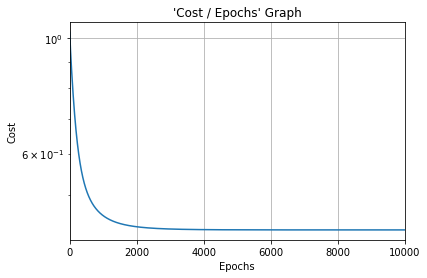

In [10]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show